# COMP 247 Project - Group 5 - Preprocessing
Predition of Killed or Seriously Injured (KSI) in Traffic Accidents in Toronto Dataset
<hr>
Aazain Ullah Khan, Younghun Mun, Tuong Nguyen Pham, Reet Kaur, Dongheun Yang
<hr>


In [1]:
# Import libraries
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('../KSI.csv')

In [3]:
# Print the shape of the data
print(df.shape)

(18194, 57)


In [4]:
# Print the first 5 rows of the data
print(df.head())

              X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   
2 -8.816480e+06  5.434843e+06  3388101  892810.0  2006   
3 -8.829728e+06  5.419071e+06  3389067  893184.0  2006   
4 -8.816480e+06  5.434843e+06  3388102  892810.0  2006   

                     DATE  TIME          STREET1         STREET2 OFFSET  ...  \
0  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
1  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
2  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   
3  2006/01/01 05:00:00+00   236     WOODBINE AVE     O CONNOR DR    NaN  ...   
4  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   

  AG_DRIV REDLIGHT  ALCOHOL  DISABILITY  HOOD_158 NEIGHBOURHOOD_158 HOOD_140  \
0     Yes      NaN      NaN         NaN        88   High Park North       88   
1     Yes 

In [5]:
# Print the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [6]:
# Print the summary statistics of the data
print(df.describe())

                  X             Y        INDEX_        ACCNUM          YEAR  \
count  1.819400e+04  1.819400e+04  1.819400e+04  1.326400e+04  18194.000000   
mean  -8.838345e+06  5.420748e+06  3.818870e+07  4.248444e+08   2012.934869   
std    1.162533e+04  8.682160e+03  3.726463e+07  1.065503e+09      4.754258   
min   -8.865305e+06  5.402162e+06  3.363207e+06  2.530100e+04   2006.000000   
25%   -8.846591e+06  5.413242e+06  5.391370e+06  1.021229e+06   2009.000000   
50%   -8.838448e+06  5.419556e+06  7.644612e+06  1.197308e+06   2012.000000   
75%   -8.829671e+06  5.427813e+06  8.078261e+07  1.365020e+06   2017.000000   
max   -8.807929e+06  5.443099e+06  8.170606e+07  4.008024e+09   2022.000000   

               TIME       WARDNUM      LATITUDE     LONGITUDE    FATAL_NO  \
count  18194.000000  1.733200e+04  18194.000000  18194.000000  827.000000   
mean    1362.615917  2.521028e+03     43.710459    -79.396201   29.073761   
std      630.816048  1.844803e+05      0.056369      0.10

In [7]:
# Check for missing values
print(df.isnull().sum())

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                8567
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

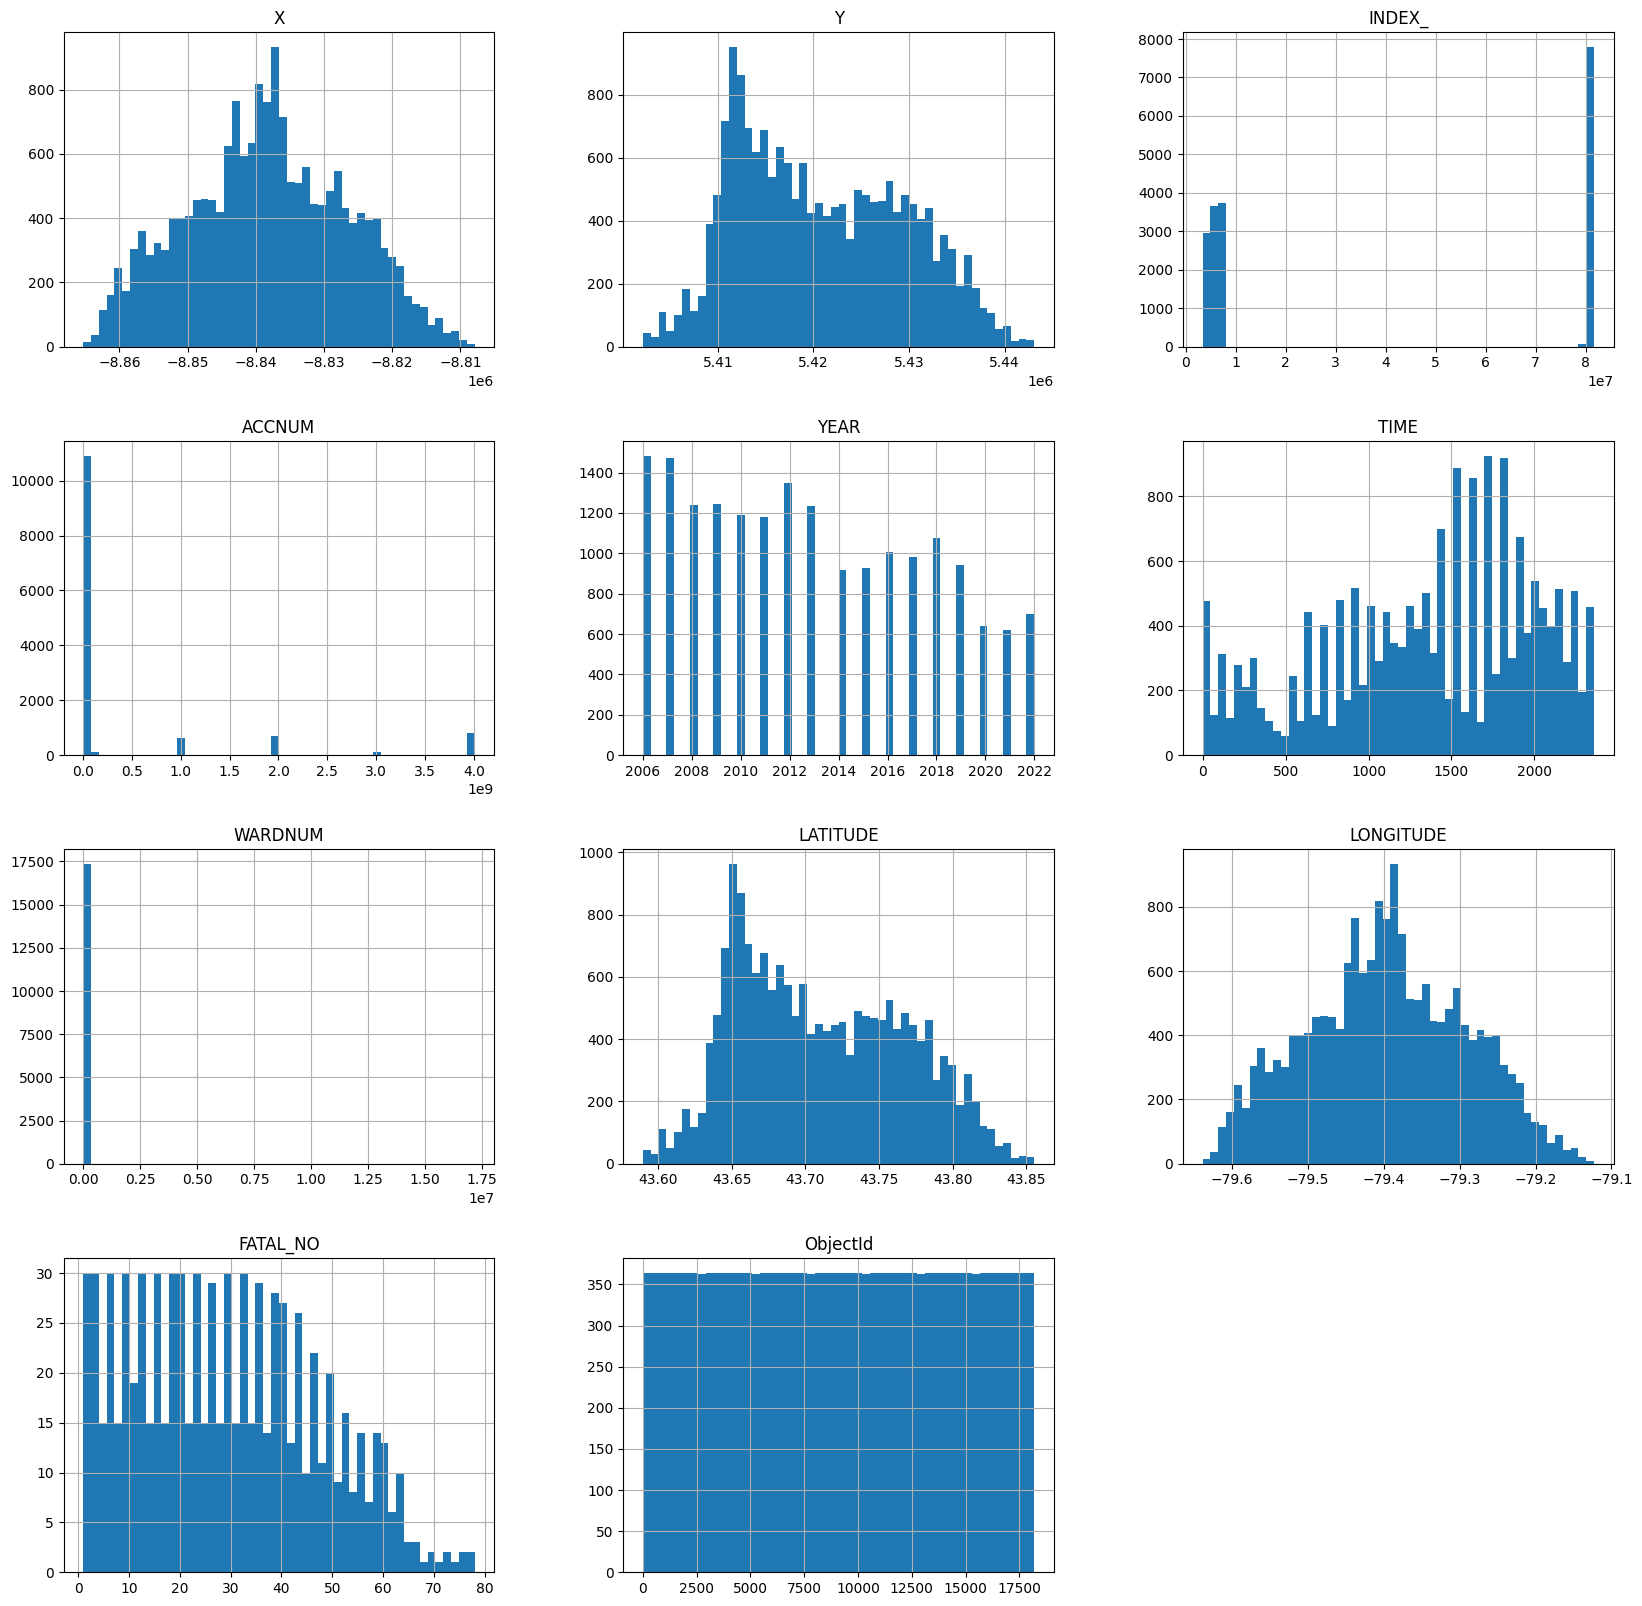

In [8]:
# Plot histogram
df.hist(bins=50, figsize=(20, 20))
plt.show()

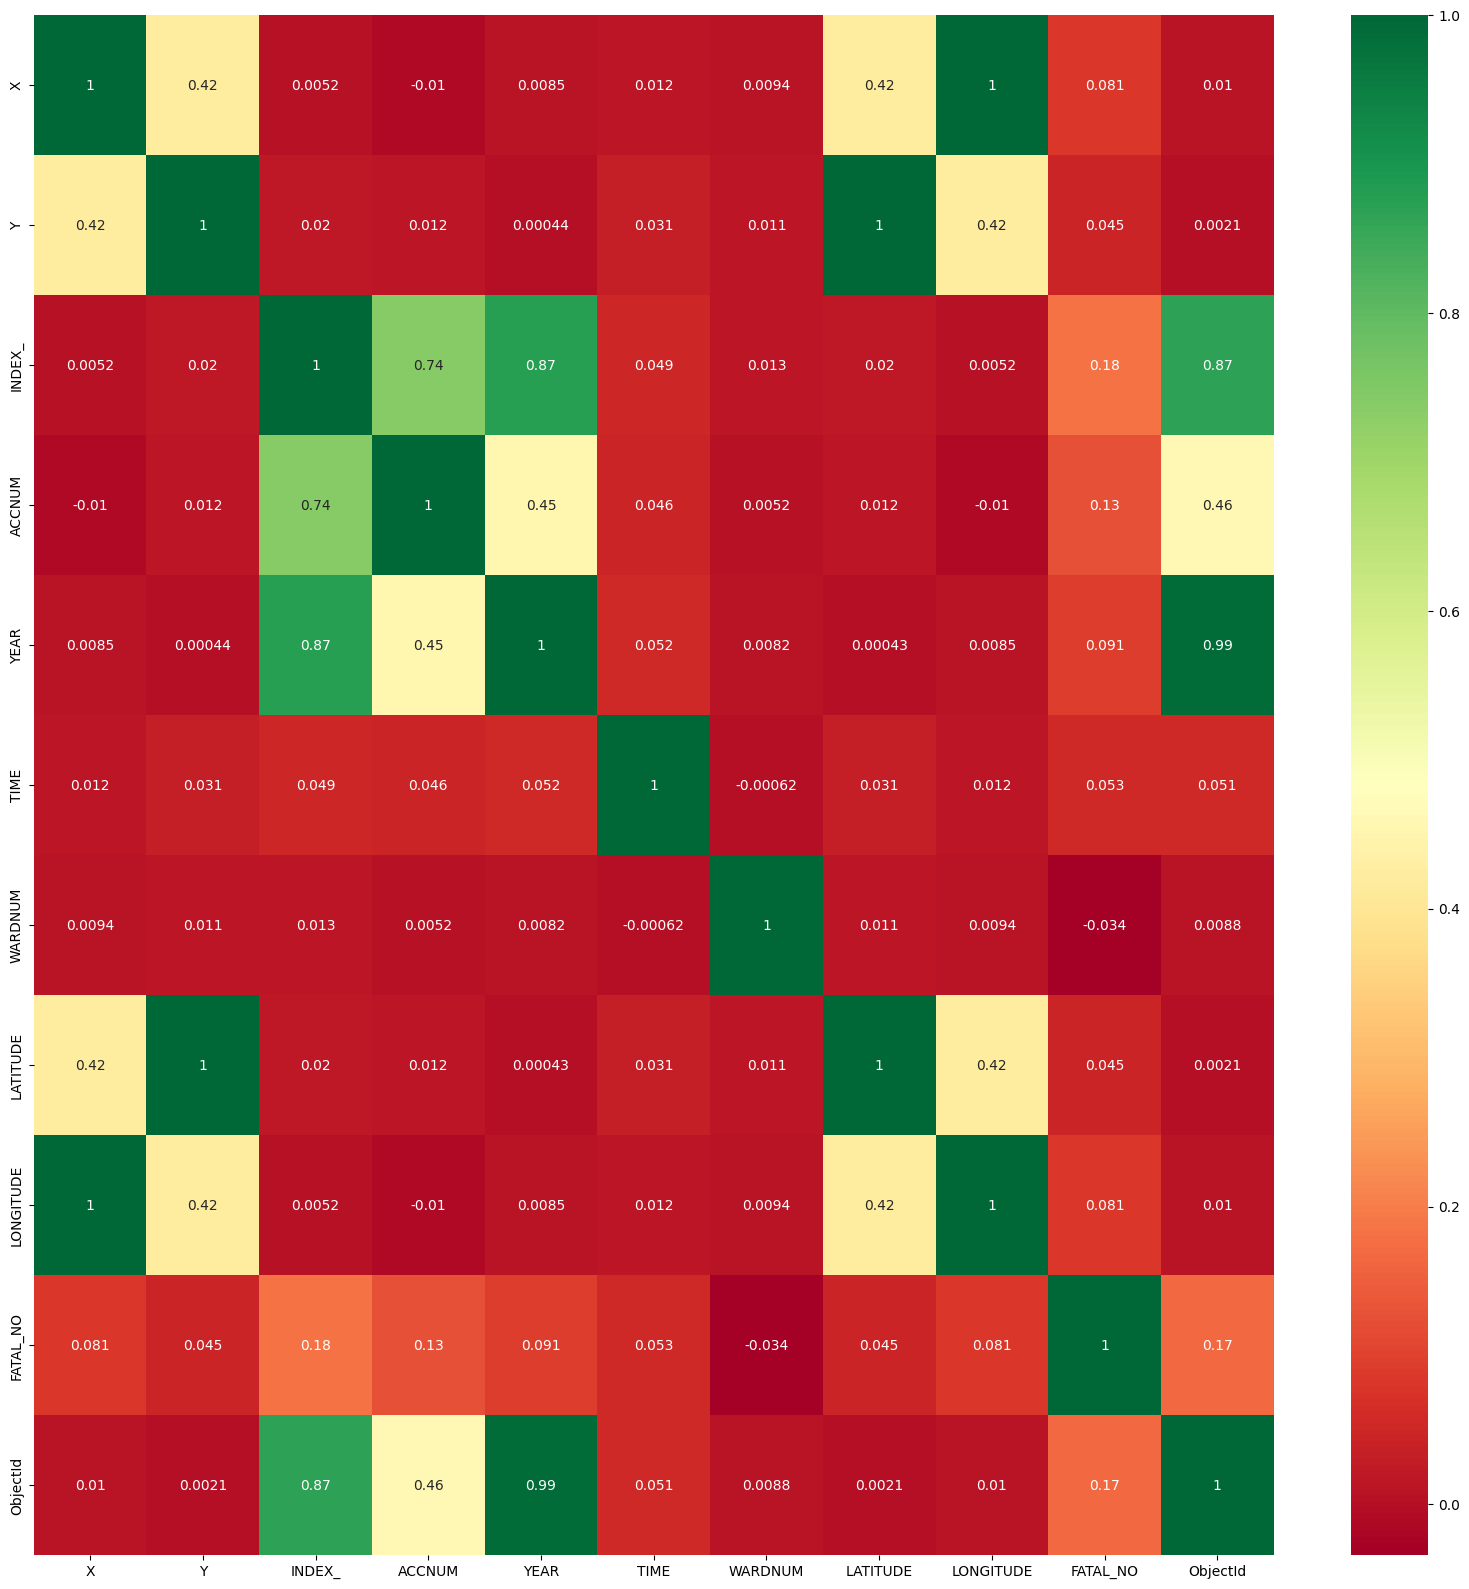

In [9]:
# Plot correlation matrix of numerical columns
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()

In [10]:
# From correlation matrix, we can see that 'X' and 'LONGITUDE', 'Y' and 'LATITUDE' are highly correlated. So, we can drop one of them.
columns_to_drop = ['X', 'Y']
df = df.drop(columns=columns_to_drop)
# Get the columns which are boolean

bool_cols = [df.columns[col] for col in range(36, 49)]

# Fill missing values with 'No' in boolean columns
bool_attributes = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
                   'EMERG_VEH', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']

for attribute in bool_attributes:
    df[attribute] = df[attribute].map(
        {'Yes': 1, '': 0}).fillna(0).astype(int)

In [11]:
# Drop columns having more than 80% missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percentages[missing_percentages > 80].index
df = df.drop(columns=columns_to_drop)

# Drop columns which may not be useful for analysis
columns_to_drop = ['ObjectId', 'INDEX_', 'ACCNUM', 'STREET1', 'STREET2',
                   'DISTRICT', 'WARDNUM', 'DIVISION', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'HOOD_158', 'HOOD_140']
'''
Explanation:
ObjectId, INDEX_, ACCNUM: These columns are unique for each row
NEIGHBOURHOOD_158, NEIGHBOURHOOD_140: These columns are indentical to 'HOOD_158' and 'HOOD_140' respectively
STREET1, STREET2: According to the requirement, model will predict the severity of accident in certain neighbourhoods
'''

"\nExplanation:\nObjectId, INDEX_, ACCNUM: These columns are unique for each row\nNEIGHBOURHOOD_158, NEIGHBOURHOOD_140: These columns are indentical to 'HOOD_158' and 'HOOD_140' respectively\nSTREET1, STREET2: According to the requirement, model will predict the severity of accident in certain neighbourhoods\n"

In [12]:
#! 'INJURY' feature which might be dropped depends on the accuracy score of model
df = df.drop(columns=columns_to_drop)

# Convert 'property' to 'non fatal'
df['ACCLASS'] = df['ACCLASS'].str.replace(
    "Property Damage Only", "Non-Fatal Injury")

In [13]:
# Categorical columns which have <3% missing values, we can drop them. The number is not remarkable, it won't affect the accuracy, it is just below 3%
cat_cols = df.select_dtypes(include='object')  # get only categorical columns
missing_percentages = cat_cols.isnull().sum()/len(df) * 100
cat_col_val_drop = missing_percentages[missing_percentages <= 3].index
cat_col_val_drop
df = df.dropna(subset=cat_col_val_drop)

print(df.isnull().sum())

YEAR                 0
DATE                 0
TIME                 0
ROAD_CLASS           0
LATITUDE             0
LONGITUDE            0
LOCCOORD             0
ACCLOC            5080
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            0
INVTYPE              0
INVAGE               0
INJURY            8325
INITDIR           4805
VEHTYPE           3173
MANOEUVER         7469
DRIVACT           8656
DRIVCOND          8658
PEDESTRIAN           0
CYCLIST              0
AUTOMOBILE           0
MOTORCYCLE           0
TRUCK                0
TRSN_CITY_VEH        0
EMERG_VEH            0
PASSENGER        11041
SPEEDING             0
AG_DRIV              0
REDLIGHT             0
ALCOHOL              0
DISABILITY           0
dtype: int64


In [14]:
# Fill null values to naN
df = df.fillna(value=np.nan)


def calculate_hour_and_minutes(time_val):
    # Ensure the time value is a string with leading zeros if necessary
    time_str = str(time_val).zfill(4)
    return int(time_str[:2]), int(time_str[2:])


df['DATE'] = pd.to_datetime(df['DATE'])

df[['HOUR', 'MINUTES']] = df['TIME'].apply(
    lambda x: calculate_hour_and_minutes(x)).apply(pd.Series)

df['MONTH'] = df['DATE'].dt.month_name()  # Get months
df['DAY'] = df['DATE'].dt.day  # Get days
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()  # Get days of week
df = df.drop(columns=['DATE'], axis=1)  # Drop 'DATE' column

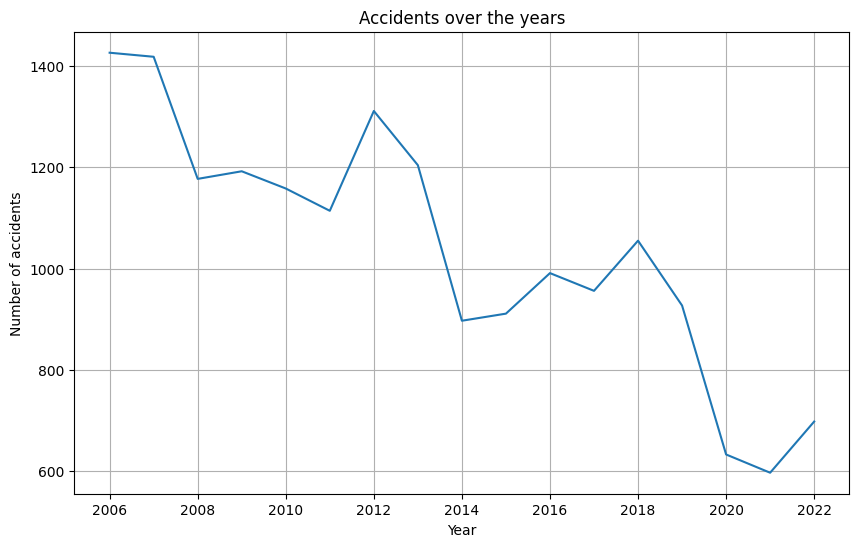

In [15]:
# accidents over the years green line plot to show the trend
plt.figure(figsize=(10, 6))
df['YEAR'].value_counts().sort_index().plot()
plt.title('Accidents over the years')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid()
plt.show()

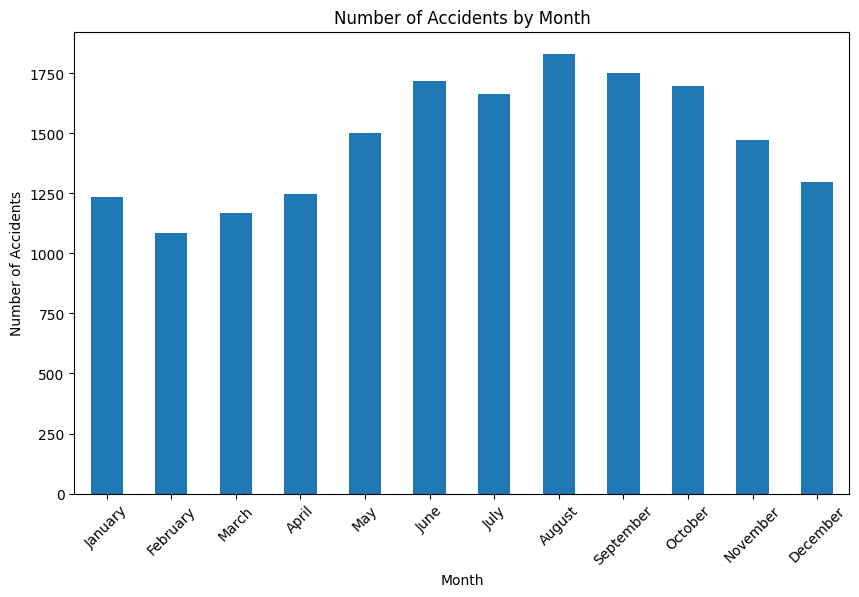

In [16]:
# Plot the number of accidents happened in each month
plt.figure(figsize=(25, 20))
df['MONTH'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                                    'October', 'November', 'December']).plot(kind='bar', figsize=(10, 6)).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

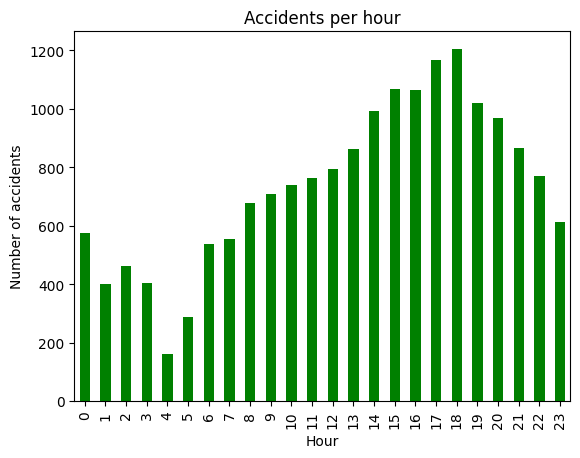

In [17]:
# accident by time of day
df['HOUR'].value_counts().sort_index().plot(kind='bar', color='green')
plt.xlabel('Hour')
plt.ylabel('Number of accidents')
plt.title('Accidents per hour')
plt.show()

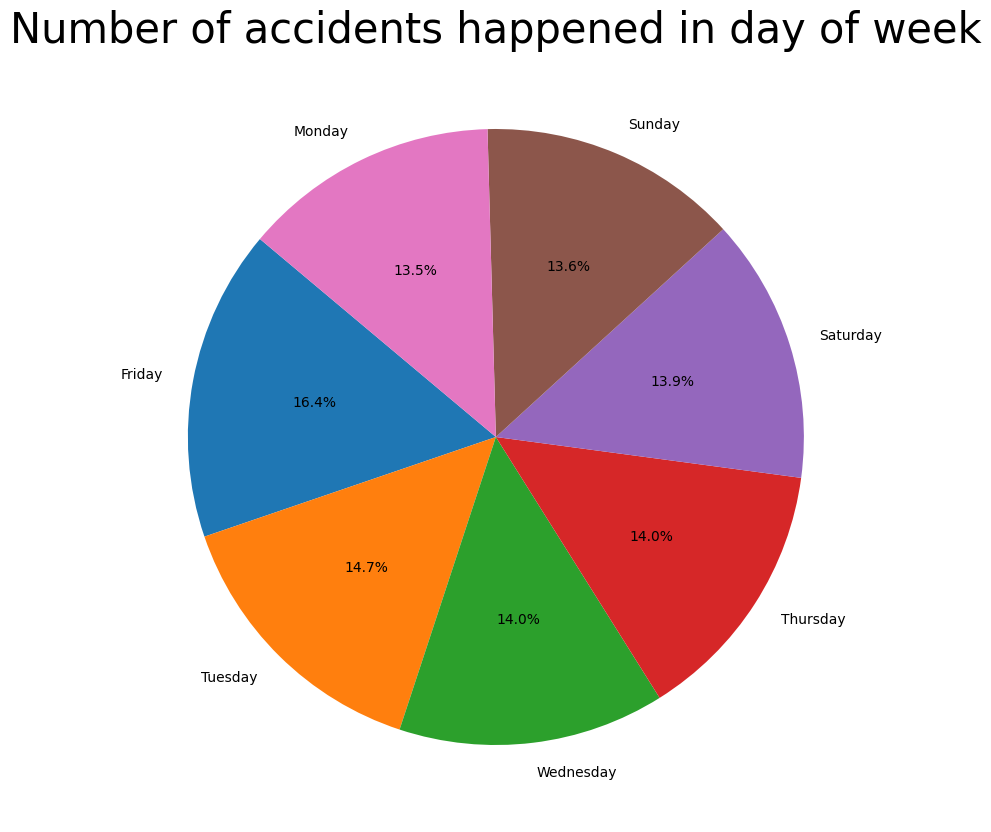

In [18]:
plt.figure(figsize=(10, 10))
df['DAY_OF_WEEK'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Number of accidents happened in day of week', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('')
plt.show()

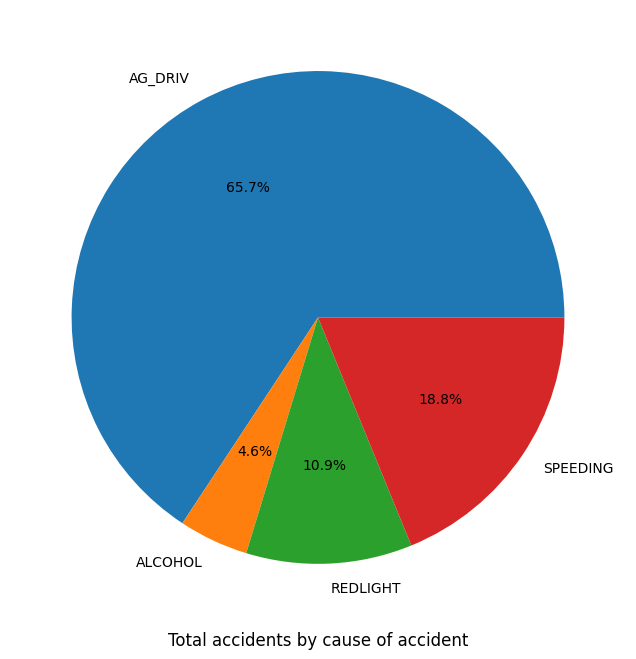

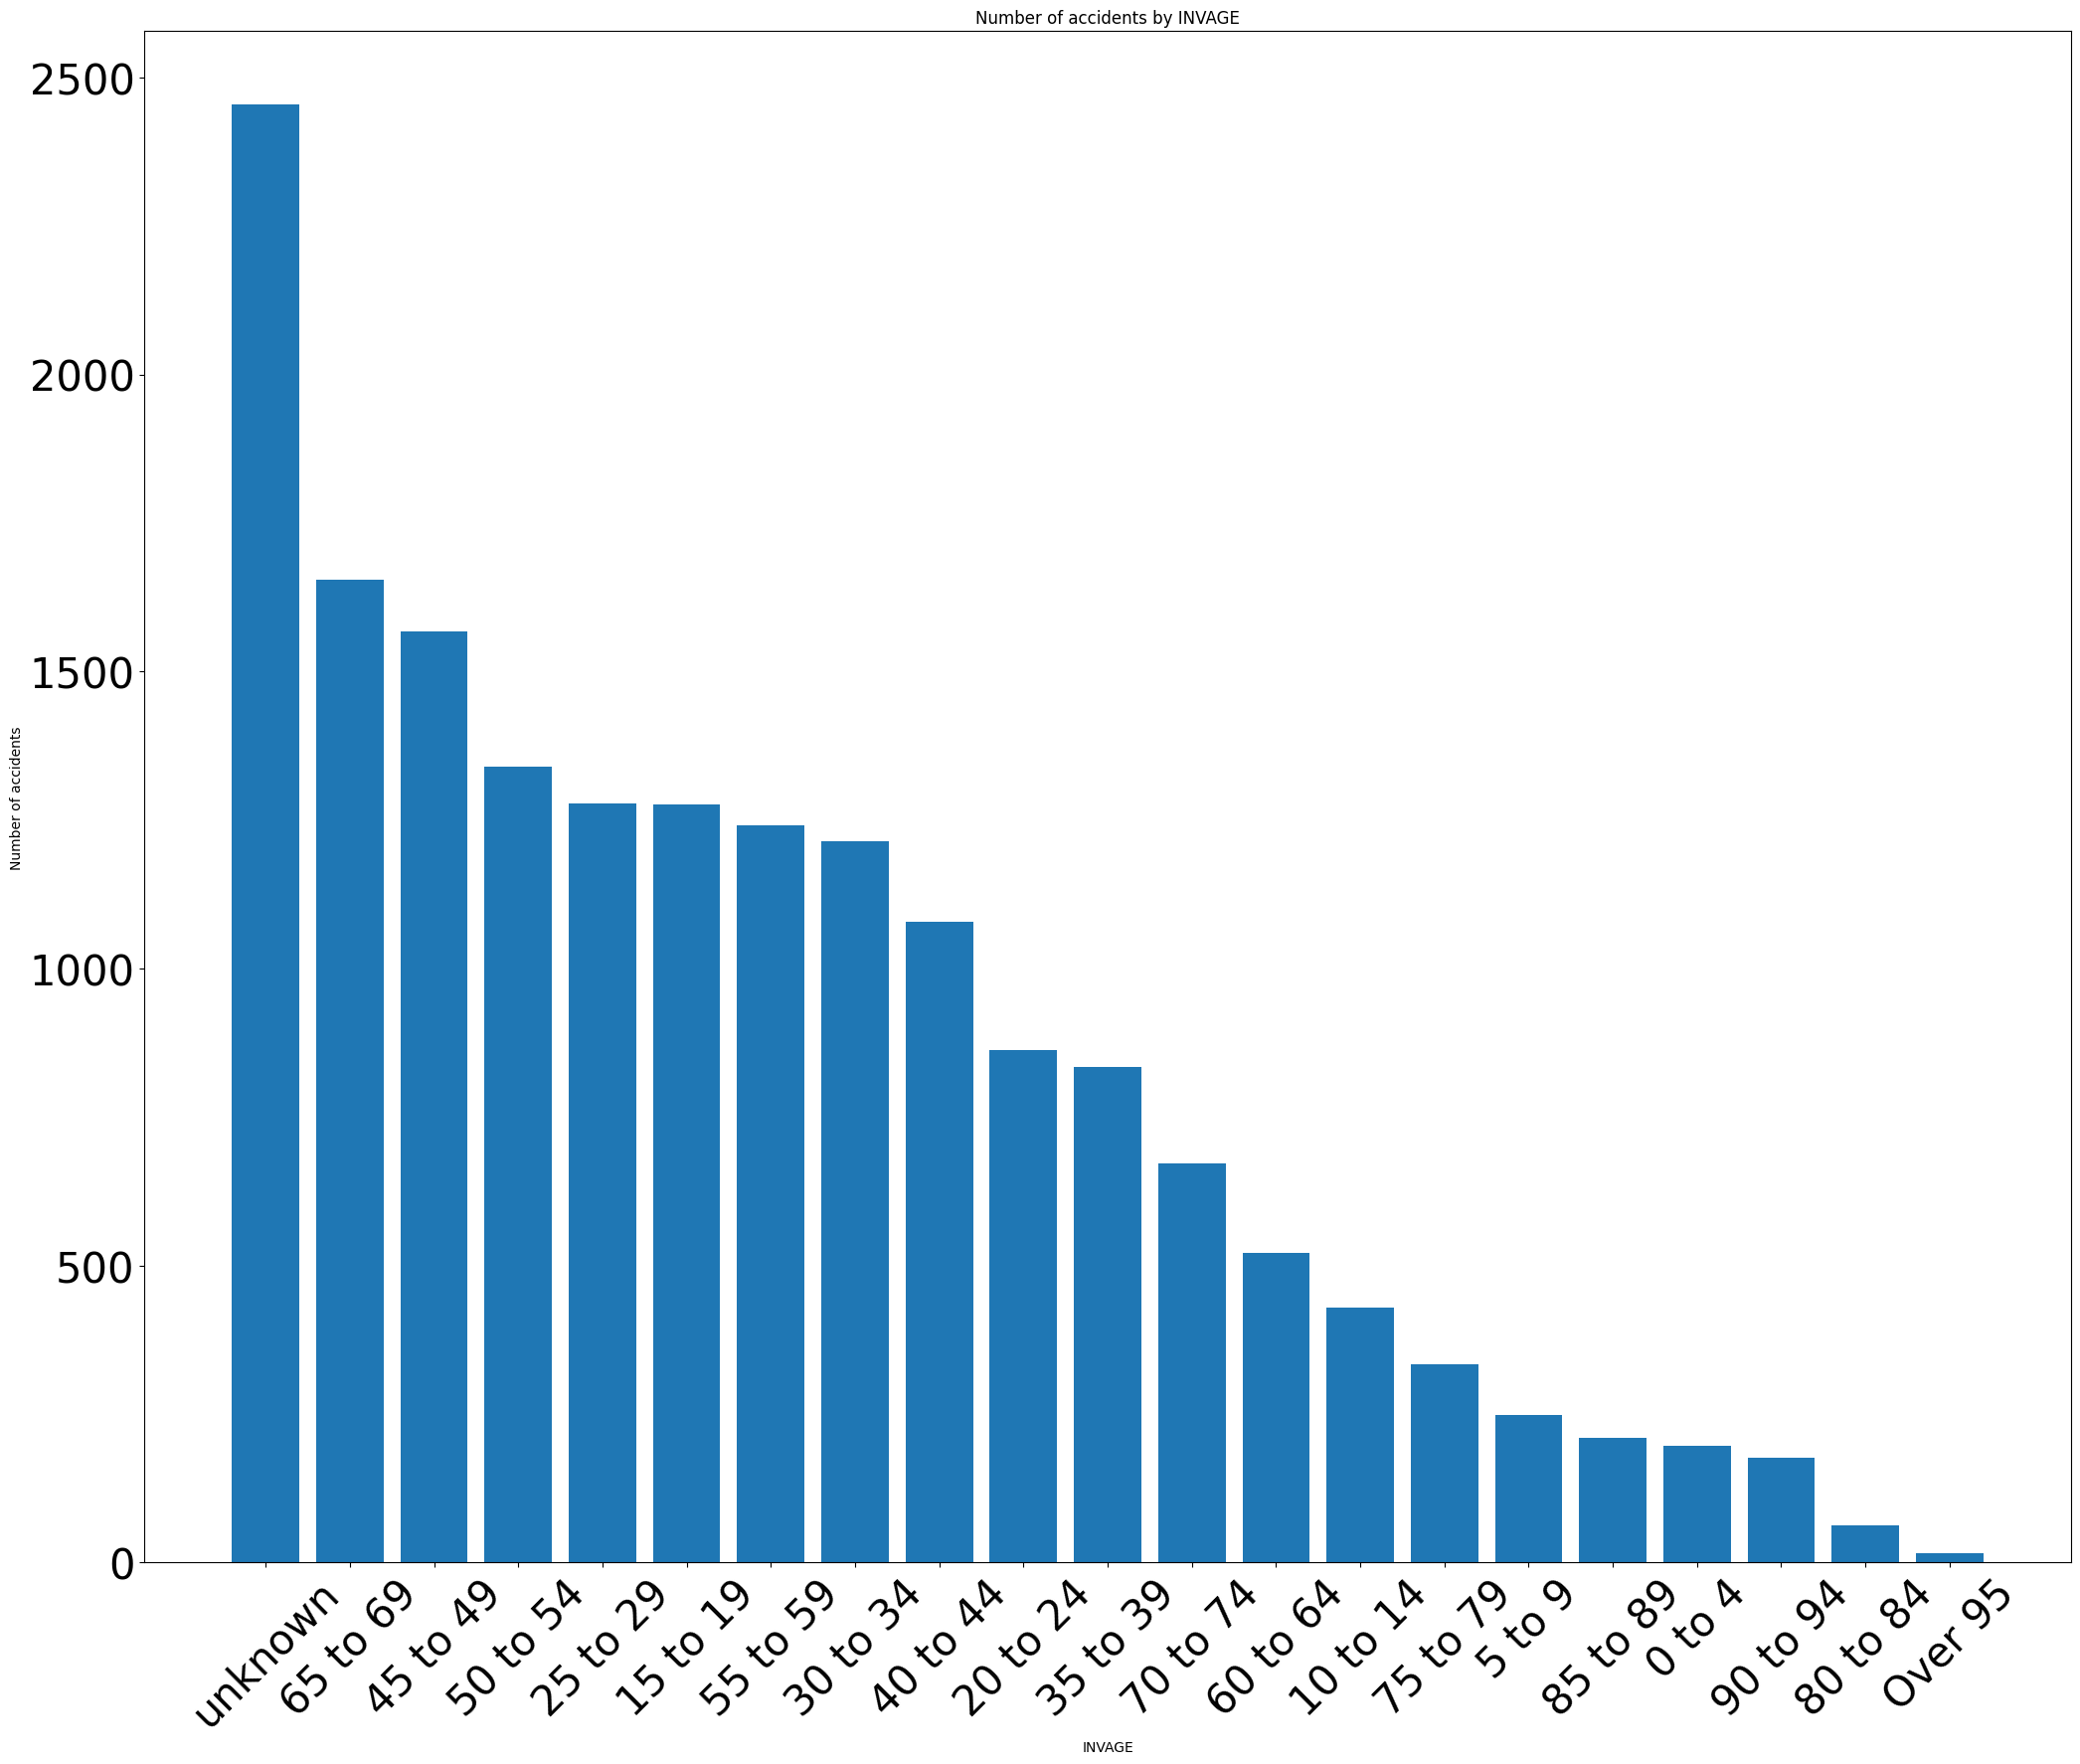

In [19]:
KSI_pivot_cause = df.pivot_table(index='YEAR',
                                 values=['SPEEDING', 'AG_DRIV',
                                         'REDLIGHT', 'ALCOHOL'],
                                 aggfunc=np.sum,
                                 margins=True,
                                 margins_name='Total Under Category')
fig, ax1 = plt.subplots(figsize=(8, 8))
KSI_pivot_cause.iloc[11].plot(
    kind='pie', ax=ax1, autopct='%3.1f%%', fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Total accidents by cause of accident', fontsize=12)

# Plot the number of accidents by INVAGE
plt.figure(figsize=(25, 20))
plt.bar(df['INVAGE'].unique(), df['INVAGE'].value_counts().values)
plt.title('Number of accidents by INVAGE')
plt.xlabel('INVAGE')
plt.ylabel('Number of accidents')
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.show()

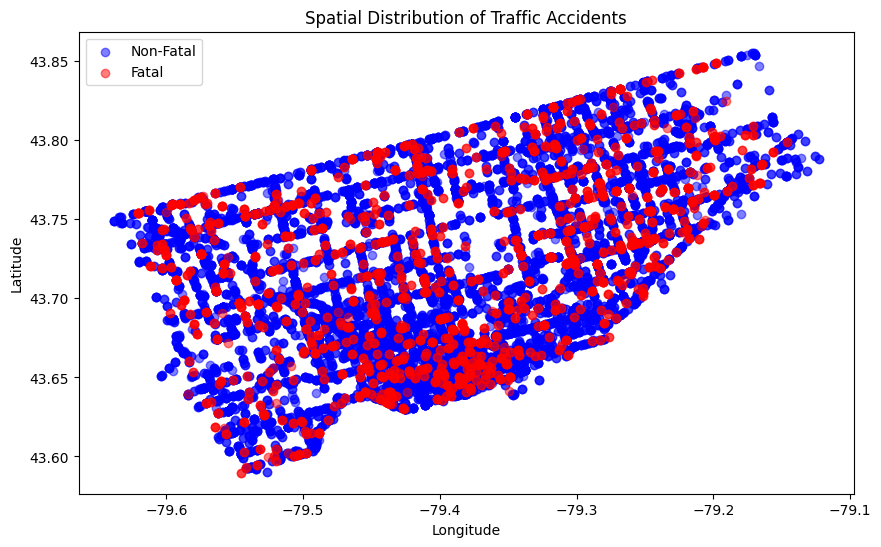

In [20]:
# Scatter plot of LATITUDE vs LONGITUDE
fatal_accidents = df[df['ACCLASS'] == 'Fatal']
non_fatal_accidents = df[df['ACCLASS'] != 'Fatal']
plt.figure(figsize=(10, 6))
# Plot non-fatal accidents
plt.scatter(non_fatal_accidents['LONGITUDE'], non_fatal_accidents['LATITUDE'],
            alpha=0.5, label='Non-Fatal', color='blue')
# Plot fatal accidents
plt.scatter(fatal_accidents['LONGITUDE'], fatal_accidents['LATITUDE'],
            alpha=0.5, label='Fatal', color='red')
plt.title('Spatial Distribution of Traffic Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [21]:
import folium
from folium.plugins import HeatMap

KSI_Fatal = df[df['ACCLASS'] == 'Fatal']
KSI_Fatal = KSI_Fatal[['LATITUDE', 'LONGITUDE', 'ACCLASS']]
lat_Toronto = df.describe().at['mean', 'LATITUDE']
lng_Toronto = df.describe().at['mean', 'LONGITUDE']
Toronto_location = [lat_Toronto, lng_Toronto]

KSI_Fatal_values = KSI_Fatal[['LATITUDE', 'LONGITUDE']].values.astype(float)

Fatal_map = folium.Map(Toronto_location, zoom_start=10.255)
HeatMap(KSI_Fatal_values, min_opacity=0.2).add_to(Fatal_map)
Fatal_map

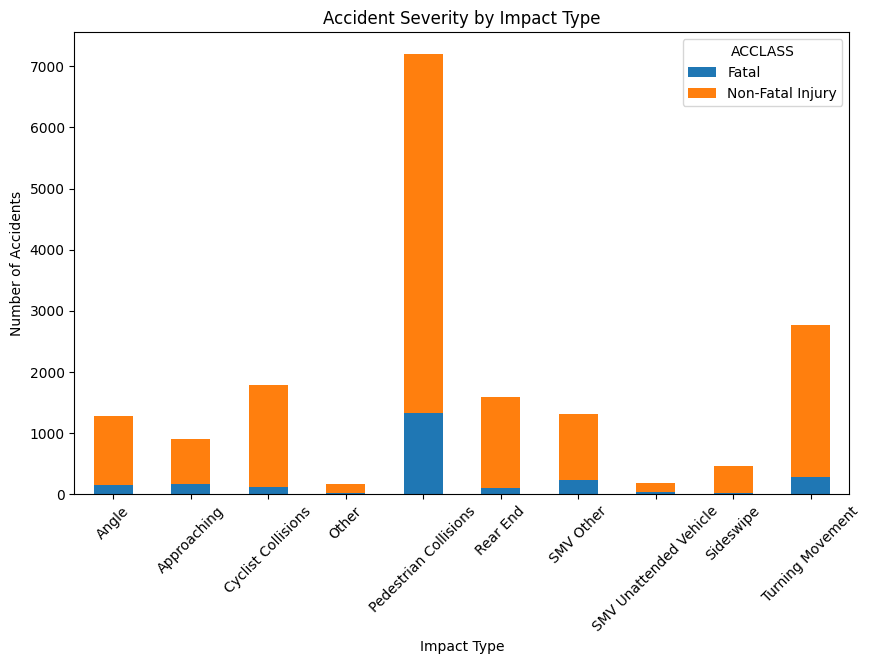

In [22]:
# Plot Accident Severity by Impact Type
df.groupby('IMPACTYPE')['ACCLASS'].value_counts().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by Impact Type')
plt.xlabel('Impact Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

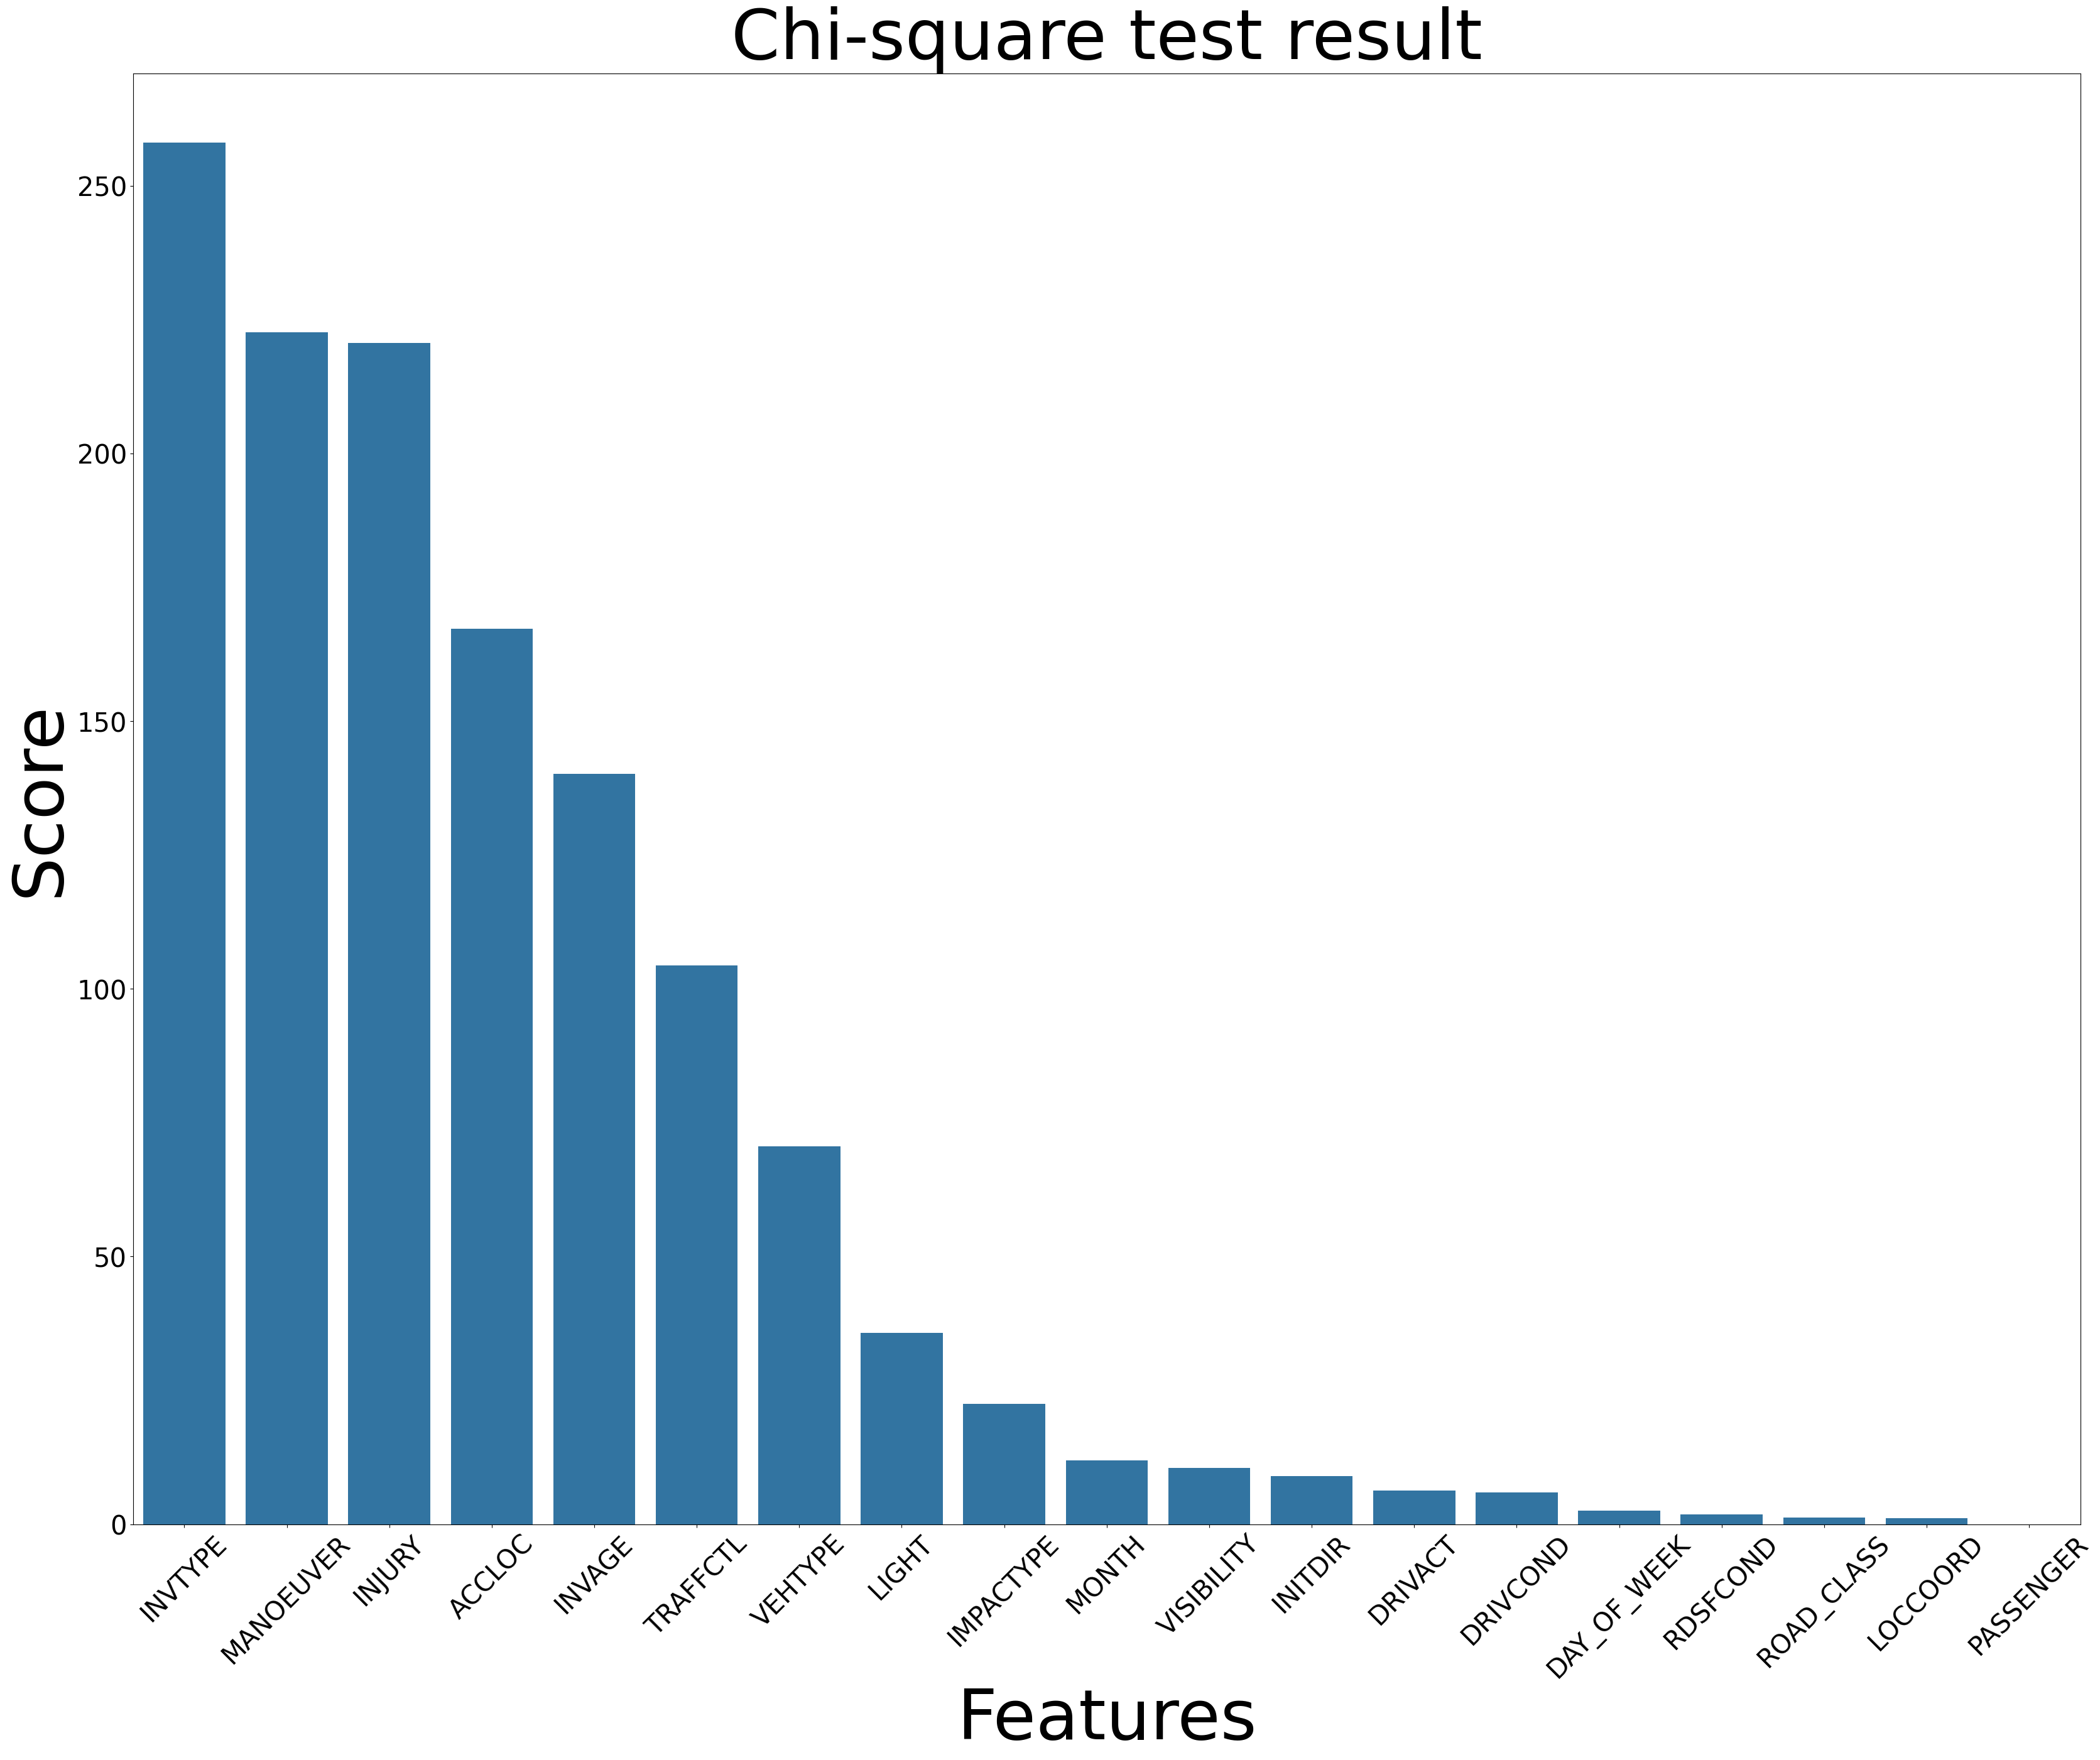

In [23]:
# Using chi-square test to find correlation between categorical columns and 'ACCLASS' column
cat_df = df.select_dtypes(include='object')
ordinal_encoder = OrdinalEncoder()
cat_df = ordinal_encoder.fit_transform(cat_df)
cat_df = pd.DataFrame(
    cat_df, columns=df.select_dtypes(include='object').columns)

X = cat_df.drop(columns=['ACCLASS'], axis=1)
feature_names = list(X.columns)
X = SimpleImputer(strategy='most_frequent').fit_transform(X)
y = cat_df['ACCLASS']
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_names, columns=['Specs'])
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Ascending order
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(40, 30))
sns.barplot(x='Specs', y='Score', data=featureScores)
plt.title('Chi-square test result', fontsize=80)
plt.xlabel('Features', fontsize=80)
plt.ylabel('Score', fontsize=80)
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.show()

In [24]:
# Create new variable copy df cleaned above to use RFE
# Using model to find important features of the original dataset
df2 = df.copy()


X = df2.drop(columns=['ACCLASS'], axis=1)
y = df2['ACCLASS']

In [25]:
num_features = X.select_dtypes(include='number').columns
cat_features = X.select_dtypes(include='object').columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

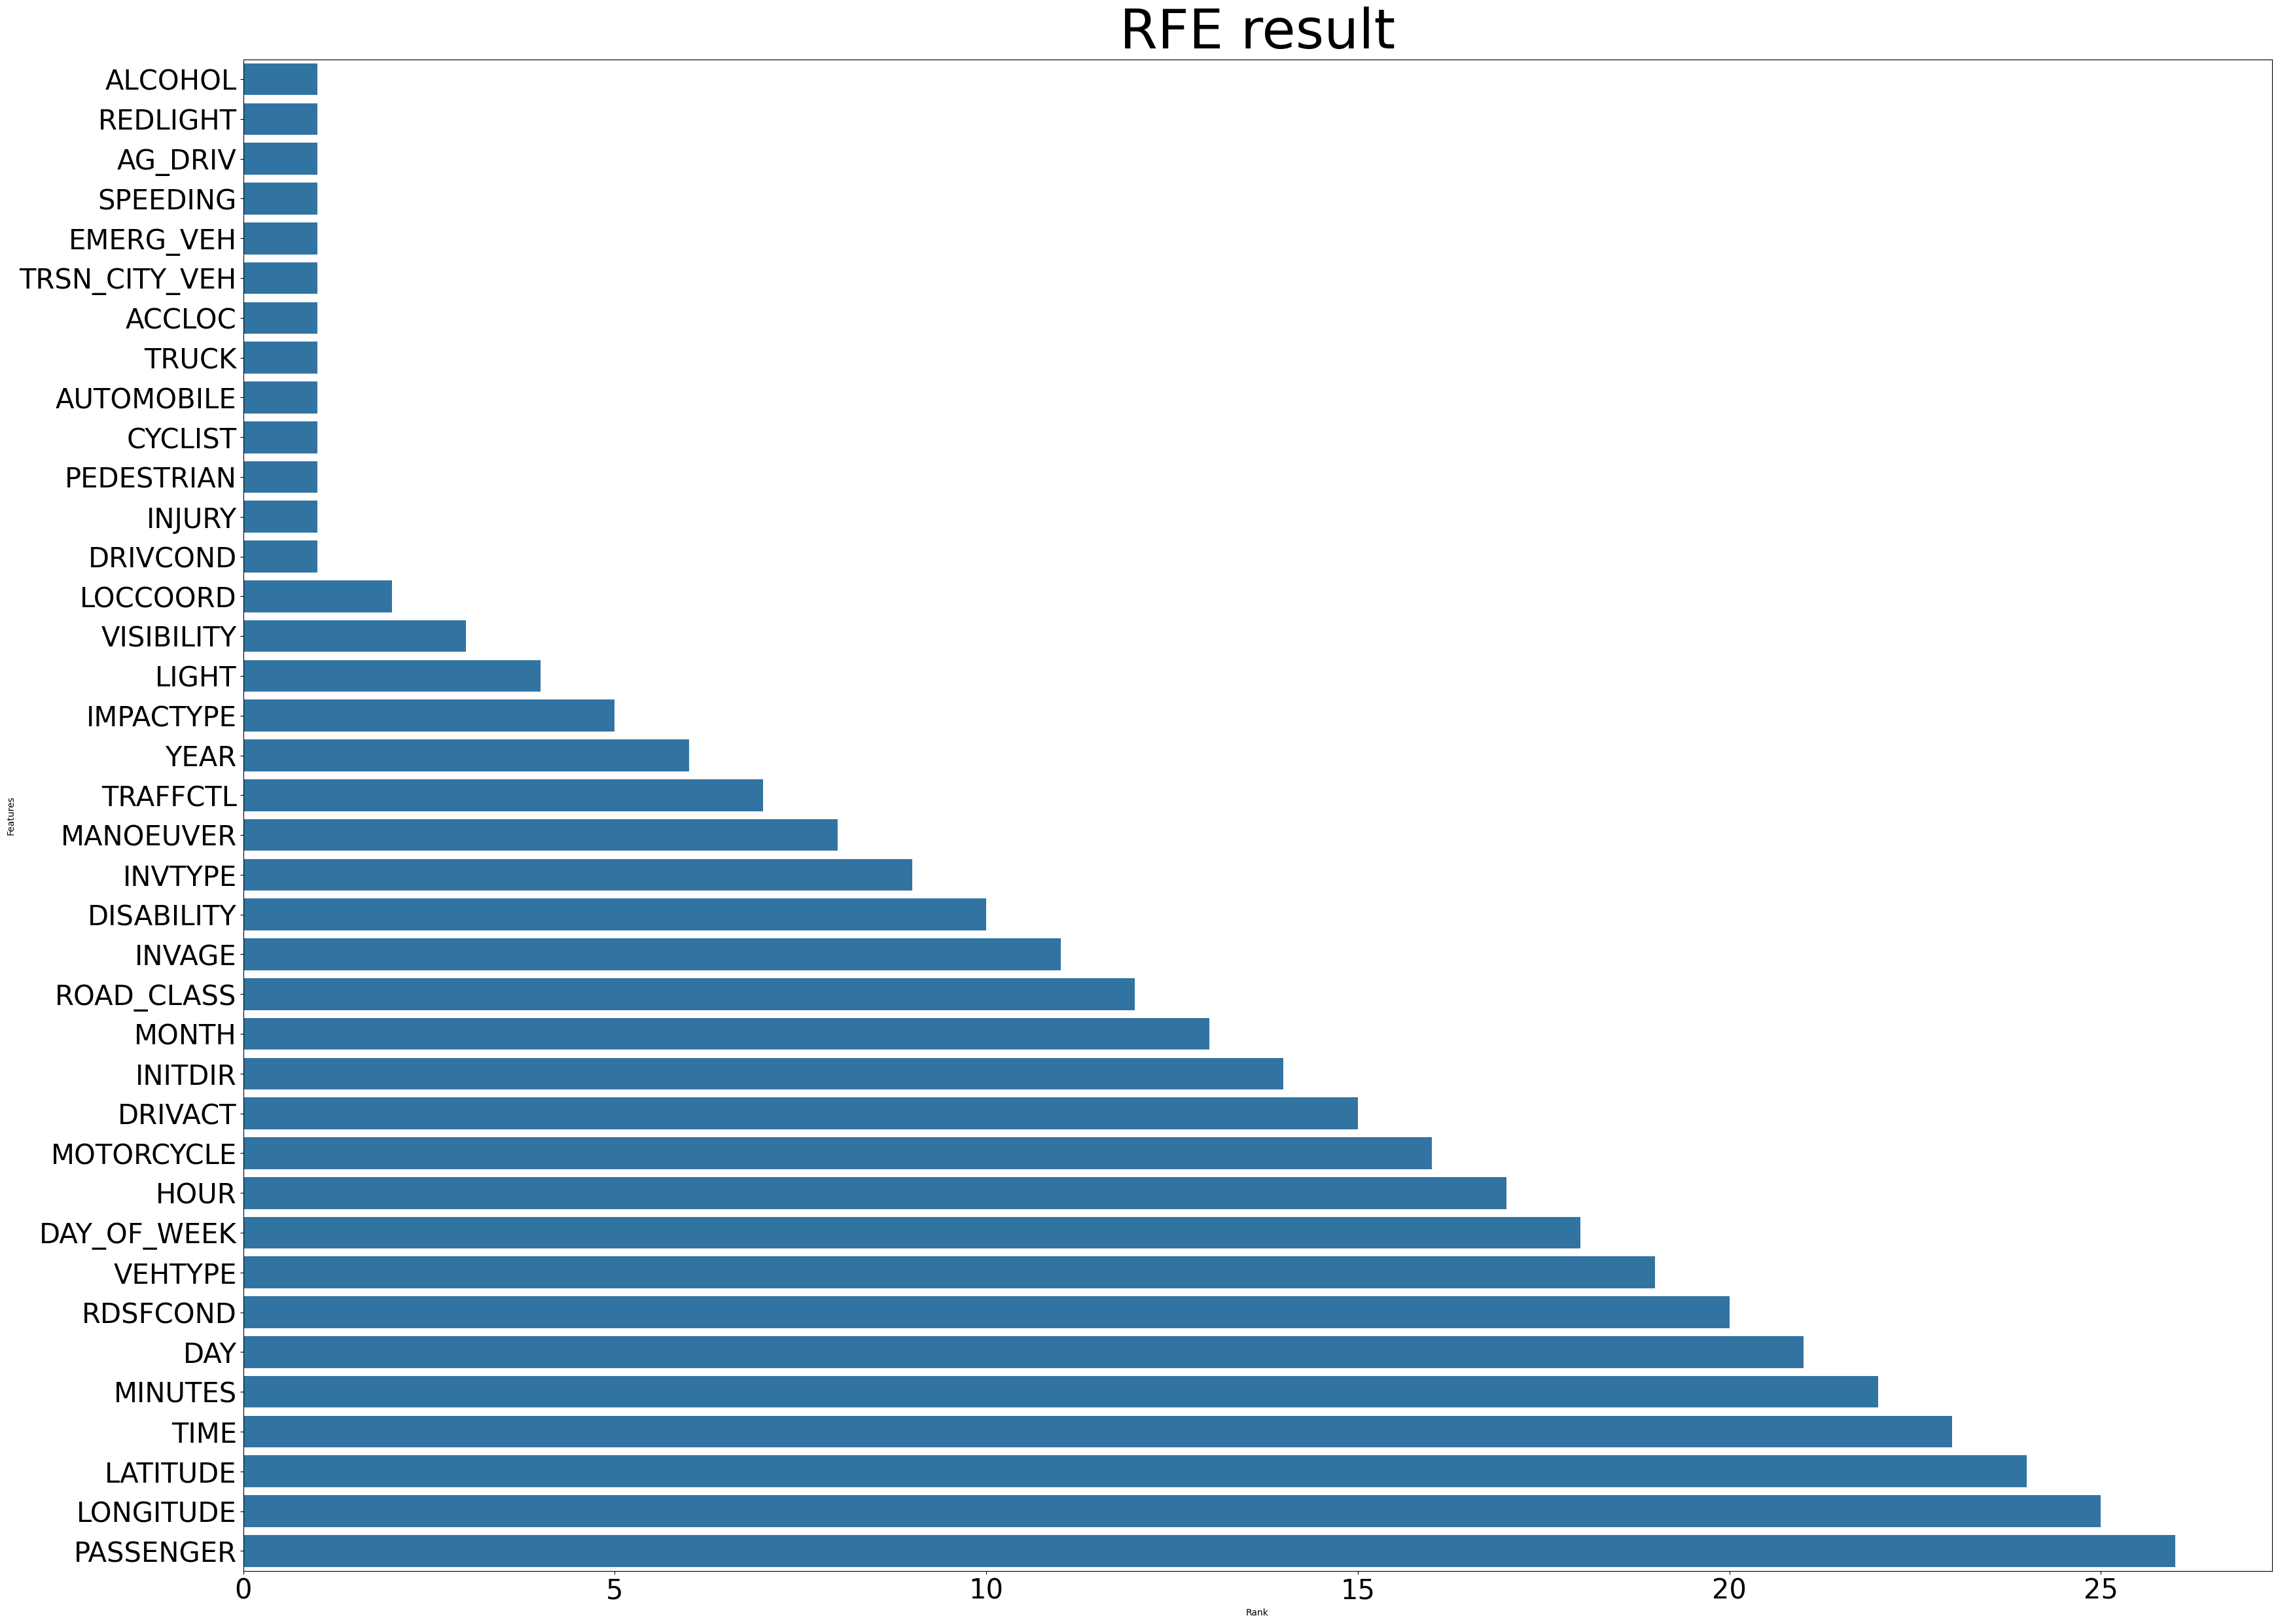

In [26]:
X_prepared = full_pipeline.fit_transform(X)
X_prepared = pd.DataFrame(
    X_prepared, columns=num_features.tolist() + cat_features.tolist())
X_prepared = X_prepared.apply(LabelEncoder().fit_transform)
# Try using Ordinal Encoder

estimator = LogisticRegression(random_state=5)
selector = RFE(estimator, step=1, n_features_to_select=13)
selector = selector.fit(X_prepared, y)
ranking = selector.ranking_
ranking = pd.DataFrame(ranking, index=X_prepared.columns, columns=['Rank'])
ranking = ranking.sort_values(by='Rank', ascending=True)

# Plot the result
plt.figure(figsize=(40, 30))
sns.barplot(x=ranking['Rank'], y=ranking.index)
plt.title('RFE result', fontsize=60)
plt.xlabel('Rank')
plt.ylabel('Features')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [27]:
print(df.columns)

Index(['YEAR', 'TIME', 'ROAD_CLASS', 'LATITUDE', 'LONGITUDE', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOUR', 'MINUTES', 'MONTH', 'DAY', 'DAY_OF_WEEK'],
      dtype='object')


In [29]:
columns_to_drop = ['YEAR', 'TIME', 'ROAD_CLASS', 'LOCCOORD', 'TRAFFCTL', 'HOUR',
                   'MINUTES', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'INITDIR']

df_official = df.drop(columns=columns_to_drop, axis=1)
df_official.to_csv('../cleaned_data_KSI.csv', index=False)